# Práctica 0: ¿Por qué visualizar?
**Visualización Científica y Narrativas**

This notebook by Luis M. de la Cruz Salas is licensed under <a href="https://creativecommons.org/licenses/by-nc-nd/4.0?ref=chooser-v1">Attribution-NonCommercial-NoDerivatives 4.0 International</a>

|`   ` Dataset 1||`   ` Dataset 2||`   ` Dataset 3||`   ` Dataset 4||
|:---:|:-----:|:----:|:----:|:----:|:-----:|:----:|:-----:|
| $x$ |  $y$  | $x$  | $y$  |  $x$ |  $y$  | $x$  |  $y$  |
|10.0 | 8.04  | 10.0 | 9.14 | 10.0 | 7.46  | 8.0  | 6.58  |
|8.0  | 6.95  | 8.0  | 8.14 | 8.0  | 6.77  | 8.0  | 5.76  |
|13.0 | 7.58  | 13.0 | 8.74 | 13.0 | 12.74 | 8.0  | 7.71  |
|9.0  | 8.81  | 9.0  | 8.77 | 9.0  | 7.11  | 8.0  | 8.84  |
|11.0 | 8.33  | 11.0 | 9.26 | 11.0 | 7.81  | 8.0  | 8.47  |
|14.0 | 9.96  | 14.0 | 8.10 | 14.0 | 8.84  | 8.0  | 7.04  |
|6.0  | 7.24  | 6.0  | 6.13 | 6.0  | 6.08  | 8.0  | 5.25  |
|4.0  | 4.26  | 4.0  | 3.10 | 4.0  | 5.39  | 19.0 | 12.50 |
|12.0 | 10.84 | 12.0 | 9.13 | 12.0 | 8.15  | 8.0  | 5.56  |
|7.0  | 4.82  | 7.0  | 7.26 | 7.0  | 6.42  | 8.0  | 7.91  |
|5.0  | 5.68  | 5.0  | 4.74 | 5.0  | 5.73  | 8.0  | 6.89  |

In [70]:
def media(X):
    suma = 0
    for xi in X:
        suma += xi
    
    return suma / len(X)

def varianza(X):
    μ = media(X)
    suma = 0
    for xi in X:
        suma += (xi - μ)**2
    
    return suma / (len(X)-1)

def covarianza(X, Y):
    μx = media(X)
    μy = media(Y)
    suma = 0.0  
    for xi, yi in zip(X, Y):
        suma += (xi - μx) * (yi - μy)
    
    return suma / (len(X)-1)

In [61]:
import pandas as pd
import numpy as np
datos = pd.read_csv("AnscombeQuartet.csv")

In [71]:
μ_x1 = media(datos.x1)
μ_y1 = media(datos.y1)
print(μ_x1, μ_y1)

9.0 7.500909090909093


In [76]:
σ_x1 = varianza(datos.x1)
σ_y1 = varianza(datos.y1)
print(σ_x1, σ_y1)

11.0 4.127269090909091


In [77]:
S_xy1 = covarianza(datos.x1, datos.y1)
print(S_xy1)

5.501


In [78]:
rho = S_xy1 / (np.sqrt(σ_x1) * np.sqrt(σ_y1) )
print(rho)

0.8164205163448399


In [79]:
print(rho**2)

0.666542459508775


## ¿Porqué Visualizar?

El proceso de transformar datos crudos en imágenes ayuda a mejorar las interpretaciones de grandes conjuntos de datos y eso permite obtener una perspectiva que podría pasarse por alto si se usarán solamente métodos estadísticos.

<h3>
Ejemplo: <a href="https://en.wikipedia.org/wiki/Anscombe%27s_quartet"> Anscombe's quartet </a>
</h3>
    
Consiste de cuatro conjuntos de datos que tienen las mismas propiedades estadísticas:
</div>

| Propiedad | Valor   |
|---|---|
| Media $\bar{x}$ | 9     |
| Media $\bar{y}$ | 7.50  |
| Varianza muestral $s_x^2$   | 11    |
| Varianza muestral $s_y^2$   | 4.125 |
| Correlación entre $x$ y $y$ | 0.816 |
| Regresión lineal | $y$ = 3.00 + 0.500$x$ |
| Coef. de determinación $R^{2}$ | 0.67 |

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe.

Referencia: Anscombe, F. J. (1973). "Graphs in Statistical Analysis". The American Statistician. 27 (1): 17–21. doi:10.2307/2682899. JSTOR 2682899. 

In [2]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
#import macti.visual

Leer el archivo con la información y ponerla en un DataFrame

In [3]:
data = pd.read_csv('AnscombeQuartet.txt', sep='\t', header=None)
data

,0,1,2,3,4,5,6,7
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [6]:
x1 = np.array(data[0])
print(x1)

[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]


In [11]:
import csv

with open("AnscombeQuartet.txt", newline='', delimiter="\t") as f:
    reader = csv.reader(f)

    for i in reader:
        print(i)

TypeError: open() got an unexpected keyword argument 'delimiter'

Organicemos un poco el DataFrame

In [3]:
header = pd.MultiIndex.from_product([['Dataset 1','Dataset 2', 
                                      'Dataset 3', 'Dataset 4'],
                                     ['x', 'y']],
                                    names=['dat','val'])
data.columns = header
data.index = [1,2,3,4,5,6,7,8,9,10,11]
data

dat Dataset 1        Dataset 2       Dataset 3        Dataset 4       
val         x      y         x     y         x      y         x      y
1        10.0   8.04      10.0  9.14      10.0   7.46       8.0   6.58
2         8.0   6.95       8.0  8.14       8.0   6.77       8.0   5.76
3        13.0   7.58      13.0  8.74      13.0  12.74       8.0   7.71
4         9.0   8.81       9.0  8.77       9.0   7.11       8.0   8.84
5        11.0   8.33      11.0  9.26      11.0   7.81       8.0   8.47
6        14.0   9.96      14.0  8.10      14.0   8.84       8.0   7.04
7         6.0   7.24       6.0  6.13       6.0   6.08       8.0   5.25
8         4.0   4.26       4.0  3.10       4.0   5.39      19.0  12.50
9        12.0  10.84      12.0  9.13      12.0   8.15       8.0   5.56
10        7.0   4.82       7.0  7.26       7.0   6.42       8.0   7.91
11        5.0   5.68       5.0  4.74       5.0   5.73       8.0   6.89

In [4]:
data.mean(axis=0) # Calculamos la media de todos los conjuntos de datos

dat        val
Dataset 1  x      9.000000
           y      7.500909
Dataset 2  x      9.000000
           y      7.500909
Dataset 3  x      9.000000
           y      7.500000
Dataset 4  x      9.000000
           y      7.500909
dtype: float64

In [5]:
data.var(axis=0) # Calculamos la varianza muestral de todos los conjuntos de datos

dat        val
Dataset 1  x      11.000000
           y       4.127269
Dataset 2  x      11.000000
           y       4.127629
Dataset 3  x      11.000000
           y       4.122620
Dataset 4  x      11.000000
           y       4.123249
dtype: float64

In [6]:
data['Dataset 1'].corr() # Correlación
                        # Cambiar el número del dataset

val,x,y
val,,
x,1.000000,0.816421
y,0.816421,1.000000


In [7]:
# Convertir los valores en un arreglo columna de numpy
X = data.iloc[:, 0].values.reshape(-1, 1)
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
def regresionLineal(data, i):
    X = data.iloc[:, i].values.reshape(-1, 1)   # Vector columna X
    Y = data.iloc[:, i+1].values.reshape(-1, 1) # Vector columna Y
    
#    if i == 4:
#        X = np.delete(X, 2).reshape(-1,1)
#        Y = np.delete(Y, 2).reshape(-1,1)

    linear_regressor = LinearRegression() # Objeto para la regresión lineal
    linear_regressor.fit(X, Y)            # Se realiza la regresión lineal
    R2 = linear_regressor.score(X,Y)      # Coeficiente de determinación
    m = linear_regressor.coef_            # Coeficientes de la regresión
    b = linear_regressor.intercept_       # lineal y = mx + b 

    X_pred = np.arange(0,21,1)
    X_pred.shape = (-1,1) # vector columna
    Y_pred = linear_regressor.predict(X_pred)  # Se realiza la predicción
    
    return X, Y, X_pred, Y_pred, R2, m[0][0], b[0]

In [9]:
# Cálculo de la regresión para el Dataset 1
X, Y, X_pred, Y_pred, R2, m, b = regresionLineal(data, 4)
print('R2 = {:0.3f} \t m = {:0.3f} \t b = {:0.3f}'.format(R2, m, b))

R2 = 0.666 	 m = 0.500 	 b = 3.002


In [10]:
# Cálculo de la regresión para todo los Dataset's
for i in range(0,7,2):
    X, Y, X_pred, Y_pred, R2, m, b = regresionLineal(data, i)
    print('Dataset {:} : R2 = {:0.3f} \t m = {:0.3f} \t b = {:0.3f}'.format(i//2+1, R2, m, b))

Dataset 1 : R2 = 0.667 	 m = 0.500 	 b = 3.000
Dataset 2 : R2 = 0.666 	 m = 0.500 	 b = 3.001
Dataset 3 : R2 = 0.666 	 m = 0.500 	 b = 3.002
Dataset 4 : R2 = 0.667 	 m = 0.500 	 b = 3.002


**¿Qué se puede decir de estos resultados?**

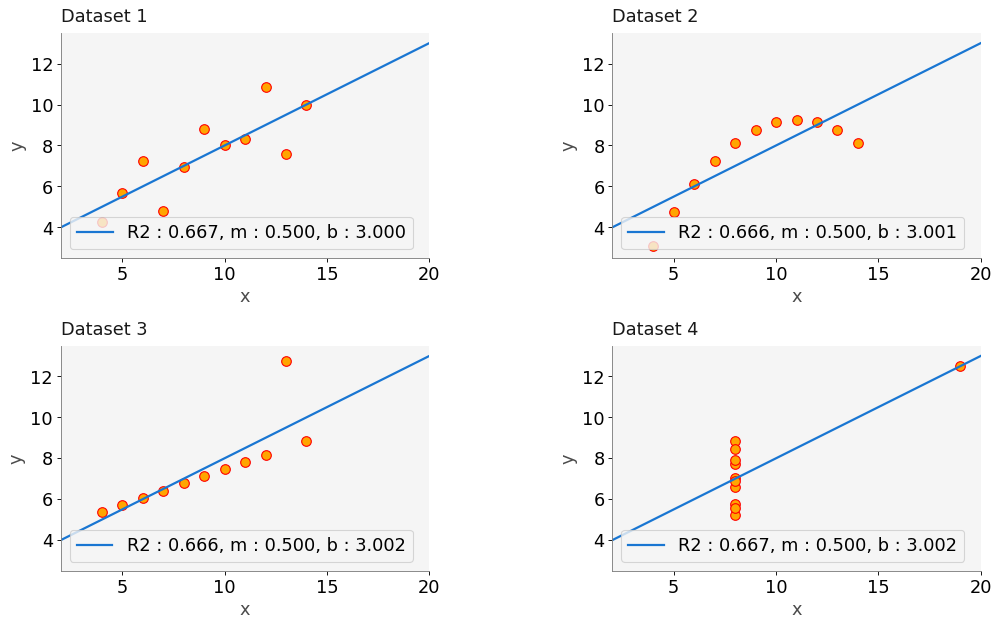

In [11]:
import matplotlib.pyplot as plt
params = {'legend.fontsize': 16,
         'axes.labelsize':16,
         'axes.titlesize':16,
         'xtick.labelsize':16,
         'ytick.labelsize':16}
plt.rcParams.update(params)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,8))

num = 1
for a in axes:
    for ax in a:
        X, Y, X_pred, Y_pred, R2, m, b = regresionLineal(data, (num - 1)*2)
        ax.scatter(X, Y, marker = 'o', c='orange', s=75, edgecolor='red')
        leyenda = 'R2 : {:0.3f}, m : {:0.3f}, b : {:0.3f}'.format(R2, m, b)
        ax.plot(X_pred, Y_pred, lw=2.0, label=leyenda)
        ax.set_xlim(2,20)
        ax.set_aspect(aspect=1.0)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_title('Dataset {}'.format(num))
        ax.legend()
        num += 1
plt.tight_layout()
plt.savefig('anscombe.png', dpi=300)


**¿Qué puede decir de estos gráficos**

- Gráfica del Dataset 1: relación lineal simple entre dos variables correlacionadas.
- Gráfica del Dataset 2: se observa una relación entre $x$ y $y$ pero no parece ser lineal.
- Gráfica del Dataset 3: relación lineal pero la regresión obtenida se ve afectada por el dato extremo que influye en el resultado final y altera el coeficiente de correlación de 1 a 0.816.
- Gráfica del Dataset 4: se muestra como un valor atípico es suficiente para producir un coeficiente de correlación alto, aún cuando la relación entre las variables no es lineal.

Este cuarteto es usado todavía en la actualidad para ilustrar la importancia de graficar los datos antes de realizar cualquier análisis estadístico. También se muestra el efecto de los valores atípicos. 

La intención fue cambiar la impresión de que **“los cálculos numéricos son exactos, pero los gráficos aproximados”**.

<a href='https://es.wikipedia.org/wiki/Edward_Tufte'>Edward Tufte</a> usó el cuarteto en la primera página del primer capítulo de su libro <a href='https://archive.org/details/visualdisplayofq00tuft/mode/2up'>*The Visual Display of Quantitative Information*</a>, para enfatizar la importancia de mirar los datos antes de analizarlos. 